In [81]:
# based on https://seaborn.pydata.org/introduction.html [doc]

In [1]:
import seaborn as sns

sns.set_theme()

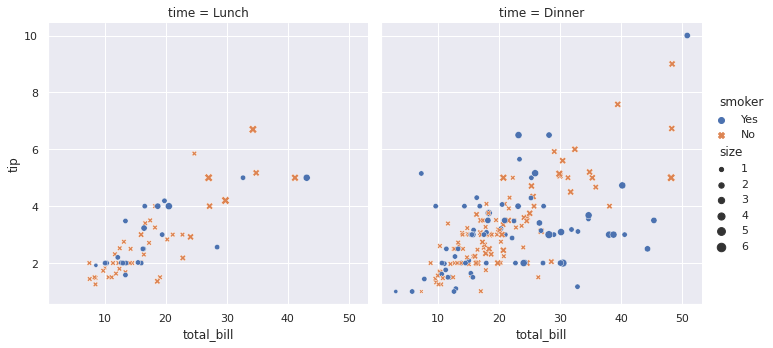

In [11]:
# getting the data
tips = sns.load_dataset("tips")

# create a viz
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

The function relplot() is named that way because it is designed to visualize many different statistical relationships.


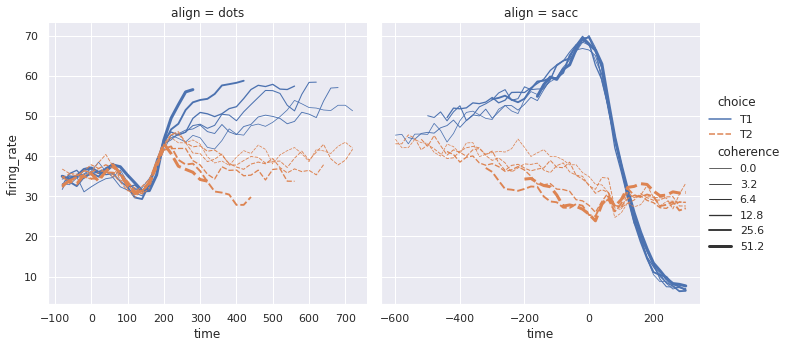

In [16]:
# using a line plot instead of a scatter, data: dots
dots = sns.load_dataset("dots")

sns.relplot(
    data=dots, 
    kind="line",
    x="time", 
    y="firing_rate", 
    col="align", 
    hue="choice", 
    size="coherence", 
    style="choice", 
    facet_kws=dict(sharex=False),
)

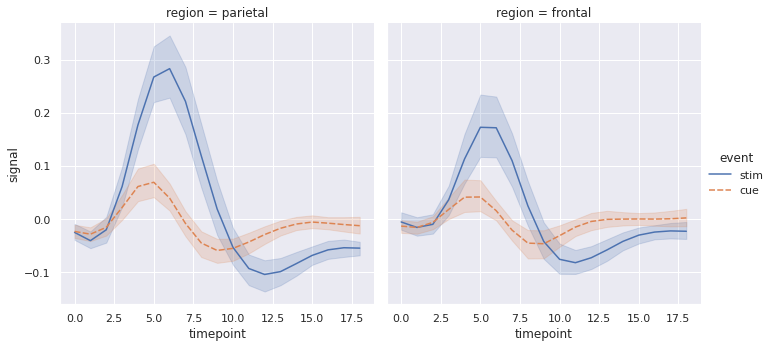

In [18]:
# statistical estimation and error bars, data: fmri
fmri = sns.load_dataset("fmri")

# viz
sns.relplot(
    data=fmri, 
    x="timepoint",
    y="signal",
    kind="line", 
    col="region", 
    hue="event", 
    style="event"
)


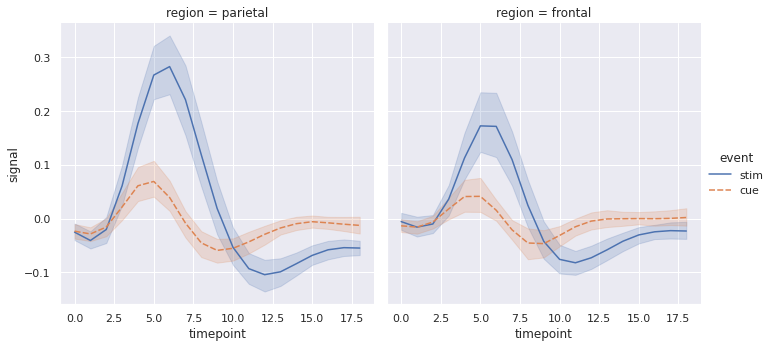

In [22]:
sns.relplot(data=fmri, kind="line", x="timepoint", y="signal", hue="event", col="region", style="event")

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

We can also plot linear regression models base on our points.

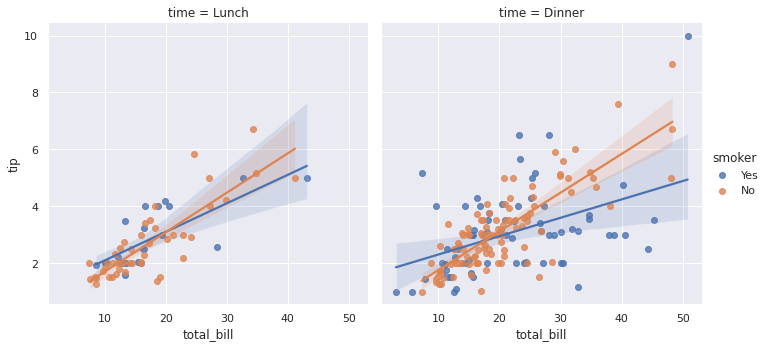

In [23]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

Statistical analyses require knowledge about the distribution of variables in your dataset. The function `distplot()` supports several approaches to visualizing distributions:

- histograms
- kernel density estimation

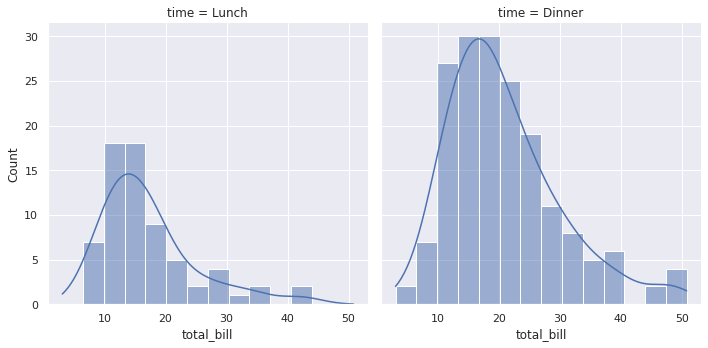

In [26]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

The function `sns.histplot(data=tips, x="total_bill", col="time")` does not support col variable, so, is better to plot histogram on more than one group using `sns.displot`.

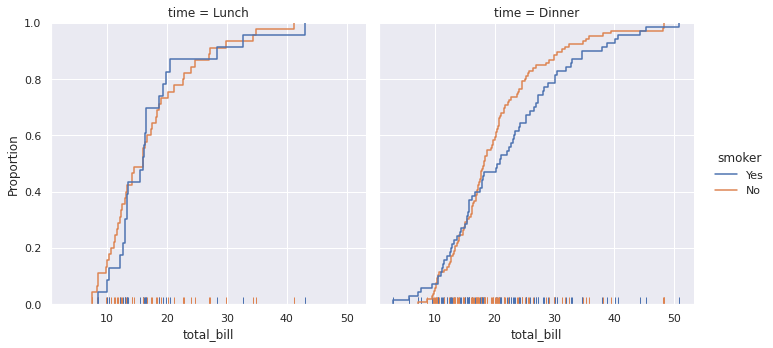

In [33]:
# empirical cumulative distribution
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## Categorical

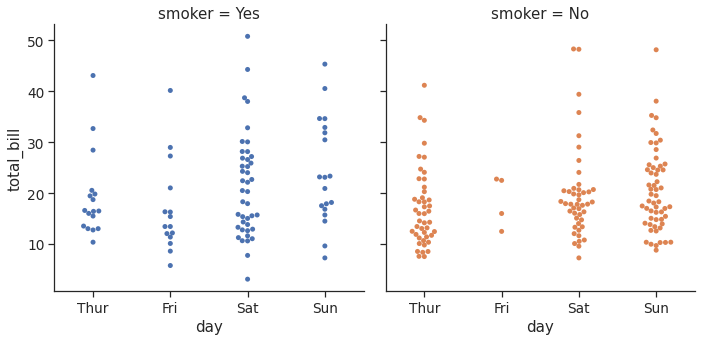

In [72]:
sns.catplot(
    data=tips, kind="swarm", x="day", y="total_bill", hue="smoker", col="smoker"
)

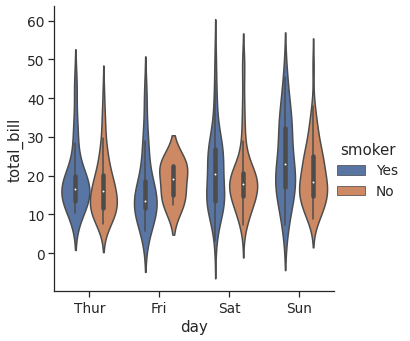

In [73]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker")

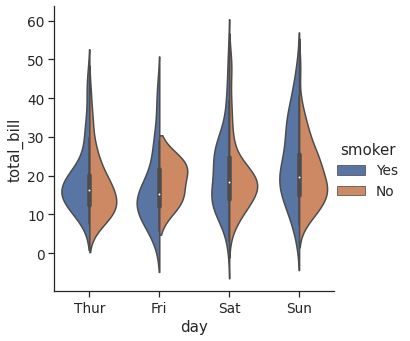

In [74]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

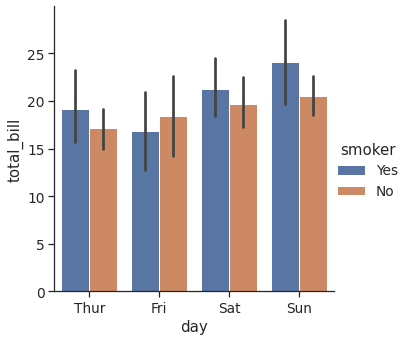

In [75]:
# or we can plot the mean with the confidence interval within each nested category
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

# Composite views onto multivariate datasets

`joinplot()`, focuses on a single relationship. It plots the joint distribution between two variables along with each variable's marginal distribution.

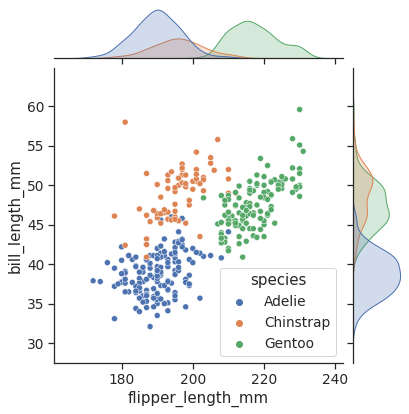

In [76]:
# data
penguins = sns.load_dataset("penguins")

# a very rich visualization
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

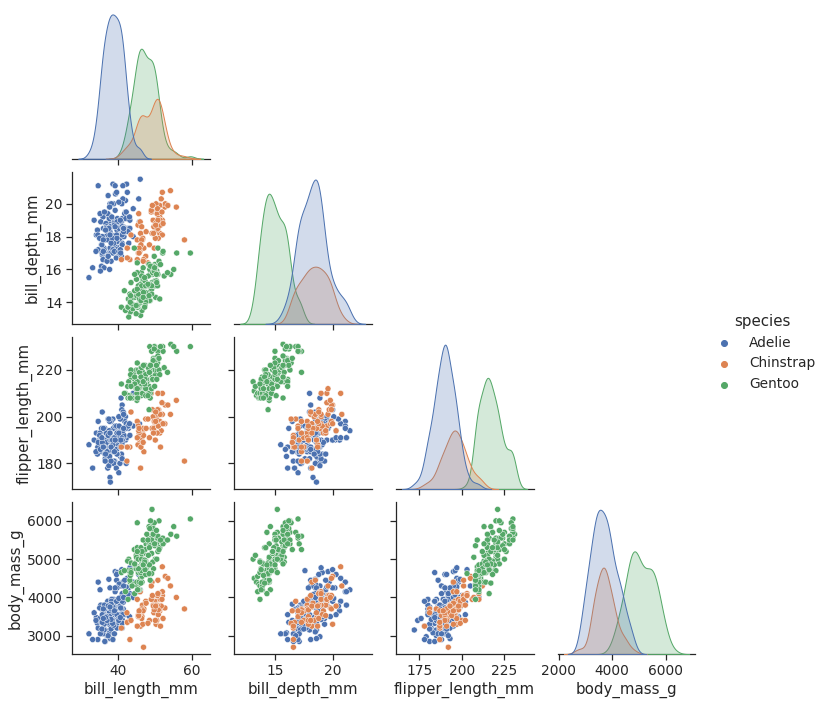

In [77]:
# pairplot is another usefull viz
sns.pairplot(data=penguins, hue="species", corner=True)

# Classes and functions for making complex graphics


These tools work by combining axes-level plotting functions with objects that manage the layout of the figure.

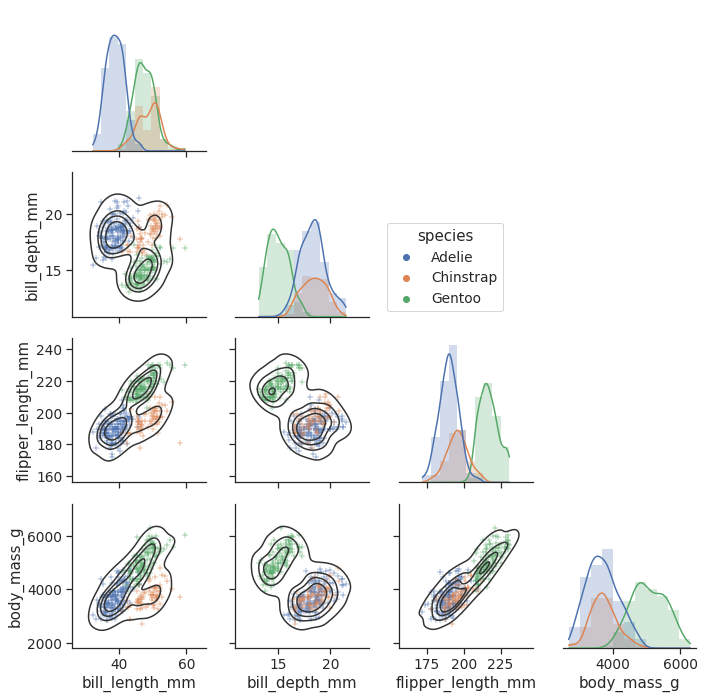

In [78]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

This is a very powerfull technique to build very rich visualizations.

# Opinionated defaults and flexible customization

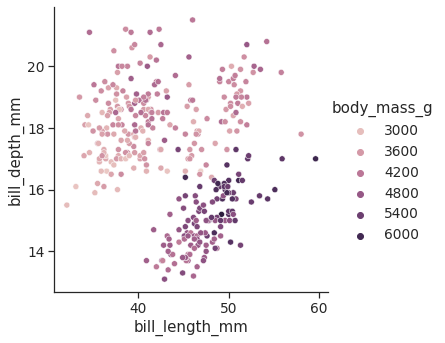

In [79]:
# some function will map color to gradients when those was based on a numeric variable
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g")

Seaborn allows for several levels of customization. It defines multiple built-in themes that apply to all figures.

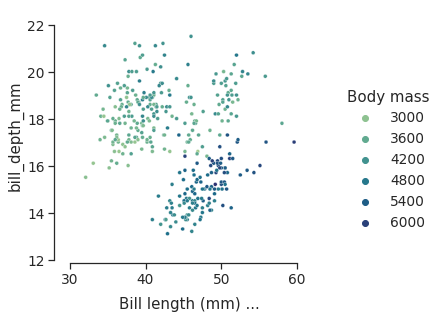

In [80]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="body_mass_g",
    palette="crest",
    marker="o",
    s=15,
)
g.set_axis_labels("Bill length (mm) ...", labelpad=10)
g.legend.set_title("Body mass")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(0.15)
g.despine(trim=True)

# Conclusion

What we saw here:

- sns.relplot(): different statistical plots
- sns.lmplot(): linear regression plots
- sns.histplot(): histogram on a single variable
- sns.distplot(): histogram and others kind of plot
- sns.jointplot(): to join different kinds of plot into one
- sns.pairplot(): very powerfull plot
- sns.PairGrid(): to full customization of the plot
- sns.catplot(): to plot categorical variables